# DLND - P2 - MLAC - UDACITY
## Deep Learning Nanodegree

### Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

![Quadricopter](images/quadricopter.jpg)

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

Before to explain this model and your training, I believe to be necessary to show the basis of operation.  This project only seeks a flight stabilization mode and the link below show the base of model.
https://www.researchgate.net/publication/225467146_Feedback_linearization_vs_adaptive_sliding_mode_control_for_a_quadrotor_helicopter_International_Journal_of_Control_Automation_and_Systems_73_419-428

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5000.                                  # time limit of the episode
init_pose = np.array([0., 0., 1., -1., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose,
            init_velocities,
            init_angle_velocities,
            runtime)
agent = Basic_Agent(task)
#done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

A quadrotor helicopter configuration with roll-pitch-yaw Euler angles 

![Euler_angles](images/euler_angles.png)

A demonstration about a rotation-direcion relashionship (https://www.dronezon.com/learn-about-drones-quadcopters/how-a-quadcopter-works-with-propellers-and-motors-direction-design-explained/)

![movement](images/axial_movement.gif)

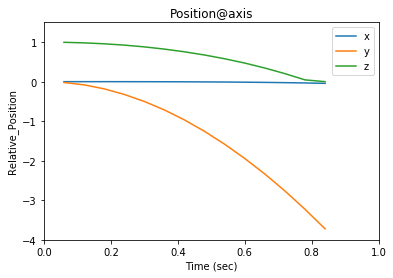

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.xlim(0, 1.)
plt.ylim(-4,1.5)
plt.legend()
plt.xlabel('Time (sec)')
plt.ylabel('Relative_Position')
plt.title('Position@axis')
plt.show()

The next code cell visualizes the velocity of the quadcopter.

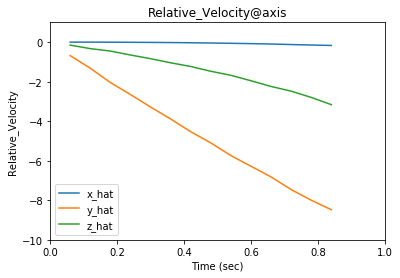

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.xlim(0, 1)
plt.ylim(-10, 1)
plt.legend()
plt.xlabel('Time (sec)')
plt.ylabel('Relative_Velocity')
plt.title('Relative_Velocity@axis')
plt.show()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

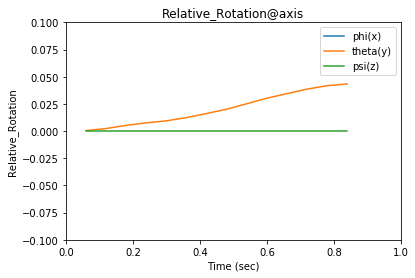

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['phi'], label='phi(x)')
plt.plot(results['time'], results['theta'], label='theta(y)')
plt.plot(results['time'], results['psi'], label='psi(z)')
plt.xlim(0, 1)
plt.ylim(-0.1, 0.1)
plt.legend()
plt.xlabel('Time (sec)')
plt.ylabel('Relative_Rotation')
plt.title('Relative_Rotation@axis')
plt.show()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

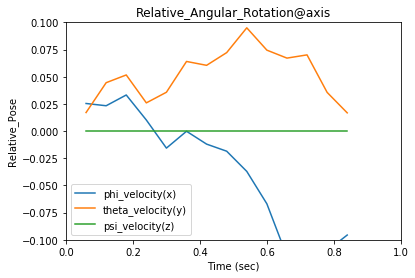

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['phi_velocity'], label='phi_velocity(x)')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity(y)')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity(z)')
plt.xlim(0, 1)
plt.ylim(-0.1, 0.1)
plt.legend()
plt.xlabel('Time (sec)')
plt.ylabel('Relative_Pose')
plt.title('Relative_Angular_Rotation@axis')
plt.show()

Finally, you can use the code cell below to print the agent's choice of actions.  

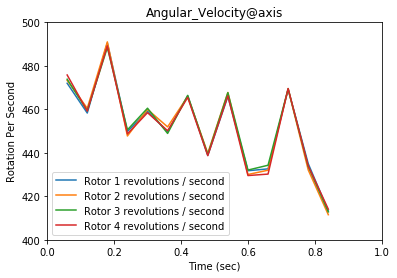

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.xlim(0, 1)
plt.ylim(400, 500)
plt.legend()
plt.xlabel('Time (sec)')
plt.ylabel('Rotation Per Second')
plt.title('Angular_Velocity@axis')
plt.show()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-0.04238163 -3.72219939  0.          5.25654585  0.04332952  0.        ]
[-0.1684212  -8.47943898 -3.16311848]
[-0.09562143  0.01676993  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import numpy as np
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =   0.517 (best =   0.993), noise_scale = 3.25

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
import numpy as np

runtime = 5000.                                                             # time limit of the episode

init_pose_1             = np.array([0., 0., 0., 0., 0., 0.])                # initial pose
init_pose_2             = np.array([0., 0., 1., -1., 0., 0.])
init_pose_3             = np.array([0., 0., 10., -10., 0., 0.])
init_pose_4             = np.array([0., 10., 10., -10., 10., 0.])

init_velocities_1       = np.array([0., 0., 0.])                            # initial velocities
init_velocities_2       = np.array([0., 0., 0.])
init_velocities_3       = np.array([5., 5., 5.])
init_velocities_4       = np.array([10., 10., 10.])

init_angle_velocities_1 = np.array([0., 0., 0.])                            # initial angle velocities
init_angle_velocities_2 = np.array([0., 0., 0.]) 
init_angle_velocities_3 = np.array([0., 0., 0.])
init_angle_velocities_4 = np.array([0., 0., 0.]) 

best_x                  = [0]                                               # maximun x calculated
best_y1                 = [0]
best_y2                 = [0]
best_x_11               = [0]
best_y_11               = [0]
best_y_12               = [0]
best_x_21               = [0]
best_y_21               = [0]
best_y_22               = [0]
best_x_31               = [0]
best_y_31               = [0]
best_y_32               = [0]
best_x_41               = [0]
best_y_41               = [0]
best_y_42               = [0]

period_1                = 3                                                # x axys of graph
period_2                = 3
period_3                = 3.5
period_4                = 3.5

base1_1                 = -1                                               # base y_left of graph (z axis)
base1_11                = -1
base1_2                 = -20
base1_21                = -1
base1_3                 = 0
base1_31                = -1
base1_4                 = -20
base1_41                = -0

range1_1                = 4                                                # top of y_left of graph
range1_11               = np.amax(best_y1) + 1.0                           # Variable top of y_left of graph... 
range1_2                = 20                                                 ## ...concerning  maximun y_left
range1_21               = np.amax(best_y1) + 1.0
range1_3                = 20
range1_31               = np.amax(best_y1) + 1.0
range1_4                = 30
range1_41               = np.amax(best_y1) + 1.0

base2_1                 = -1                                              # base y_right of graph (reward)
base2_11                = np.amin(best_y2)                                
base2_2                 = -20
base2_21                = np.amin(best_y2)
base2_3                 = -8
base2_31                = np.amin(best_y2)
base2_4                 = -12
base2_41                = np.amin(best_y2)

range2_1                = 4                                               # top of y_right of graph
range2_11               = np.amax(best_y2) + 1.0                          # Variable top of y_left of graph...
range2_2                = 80                                              ## ...concerning  maximun y_left
range2_21               = np.amax(best_y2) + 1.0
range2_3                = 12
range2_31               = np.amax(best_y2) + 1.0
range2_4                = 20
range2_41               = np.amax(best_y2) + 1.0

display_graph           = True
display_freq            = 1

color                   = 'tab:red'                                       # Graph color
color2                  = 'tab:blue'
color3                  = 'tab:green'
color4                  = 'tab:brown'


In [11]:
def train_model11(x_11, y_11, y_12, color_y_11=color2, color_y_12=color3):
   left_graph.plot(x_11, y_11, color_y_11)
   right_graph.plot(x_11, y_12, color_y_12)
   fig.canvas.draw()

In [12]:
def train_model21(x_21, y_21, y_22, color_y_21=color2, color_y_22=color3):
   left_graph.plot(x_21, y_21, color_y_21)
   right_graph.plot(x_21, y_22, color_y_22)
   fig.canvas.draw()

In [13]:
def train_model31(x_31, y_31, y_32, color_y_31=color2, color_y_32=color3):
   left_graph.plot(x_31, y_31, color_y_31)
   right_graph.plot(x_31, y_32, color_y_32)
   fig.canvas.draw()

In [18]:
def train_model41(x_41, y_41, y_42, color_y_41=color2, color_y_42=color3):
   left_graph.plot(x_41, y_41, color_y_41)
   right_graph.plot(x_41, y_42, color_y_42)
   fig.canvas.draw()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using TensorFlow backend.


<IPython.core.display.Javascript object>


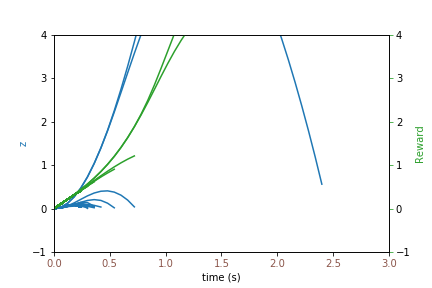

Episode    0: Reward 5.365939689989194
Episode = 1000, score =   0.000, total =   5.366, (best =    -inf), noise_scale = 0.1Episode    1: Reward 8.70874865411589
Episode = 1000, score =   0.101, total =   0.507, (best =   0.266), noise_scale = 0.1Best total reward = 8.70874865411589


<IPython.core.display.Javascript object>


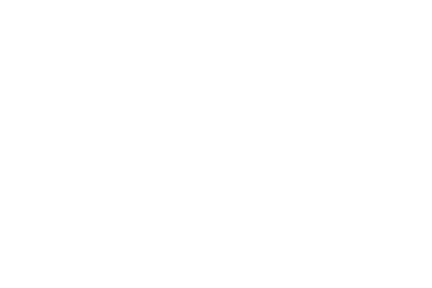

In [14]:
# TODO: Train your agent here.
%load_ext autoreload
%autoreload 2
import numpy as np
from agents.agent import DDPG
from task import Task
import matplotlib.pyplot as plt
%matplotlib notebook

task = Task(init_pose_1,
            init_velocities_1,
            init_angle_velocities_1,
            runtime)

agent = DDPG(task)                                                       

display_graph = True
display_freq = 1

period = period_1
base1  = base1_1
base11 = base1_11
range1 = range1_1
range11= range1_11
base2  = base2_1
base21 = base2_11
range2 = range2_1
range21= range2_11

fig, left_graph= plt.subplots(1,1)                                       # fig, ax1 = plt.subplots()
right_graph = left_graph.twinx()
left_graph.set_xlim(0, period)                                           # this is typically time
left_graph.set_ylim(base1, range1)                                       # limits to your y_11
right_graph.set_xlim(0, period)                                          # time, again
right_graph.set_ylim(base2, range2)                                      # limits to your y_12
left_graph.set_xlabel('time (s)')                                        # ax1.set_xlabel('time (s)')
left_graph.tick_params(axis='x', labelcolor=color4)                      # ax1.tick_params(axis='y', labelcolor=color)
left_graph.set_ylabel('z', color=color2)                                 # ax1.set_ylabel('exp', color=color)
left_graph.tick_params(axis='z', color=color2)
right_graph.set_ylabel('Reward', color=color3)                           # ax2.set_ylabel('sin', color=color)
right_graph.tick_params(axis='y', color=color3)                          # ax2.tick_params(axis='y', labelcolor=color)

total_rewards_1 = []
train_model11(best_x_11, best_y_11, best_y_12)

for episode in range(num_episodes + 1):
    state = agent.reset_episode()
    done = False
    
    x_11, y_11, y_12 = [], [], []
    
    while done is False:
        x_11.append(task.sim.time)                                        # x: time
        y_11.append(task.sim.pose[2])                                     # y_11: z axis
        y_12.append(agent.total_reward)                                   # y_12: score
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        
    # store total rewards of each episode
    total_rewards_1.append(np.amax(y_12))
        
    # store if best reward
    if np.amax(y_12) > np.amax(best_y_12):
        best_x_11, best_y_11, best_y_12 = x_11, y_11, y_12
        print("Episode {:4d}: Reward {}".format(episode, np.amax(best_y_12)))
        
    if (episode % display_freq == 0) and (display_graph is True):
        train_model11(x_11, y_11, y_12)
        print("\rEpisode = {:4d}, score = {:7.3f}, total = {:7.3f}, (best = {:7.3f}), noise_scale = {}".format(
              i_episode, agent.score, agent.total_reward, agent.best_score, agent.noise_scale), end="")
        #print("Episode = {:4d}, total = {:7.3f}, noise = {}".format(
        #    episode, agent.total_reward, agent.noise_scale))

print("Best total reward = {}".format(np.amax(best_y_12)))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


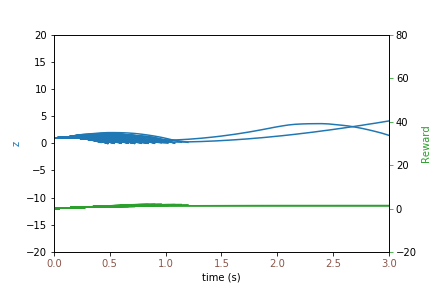

Episode    0: Reward 1.110397120697616
Episode = 1000, score =   0.079, total =   1.032, (best =   0.079), noise_scale = 0.1Episode    5: Reward 1.0874608348170596
Episode = 1000, score =   0.083, total =   0.996, (best =   0.142), noise_scale = 0.1Episode  119: Reward 1.5389260505874902
Episode = 1000, score =   0.087, total =   1.300, (best =   0.142), noise_scale = 0.1Episode  154: Reward 1.694618612516699
Episode = 1000, score =   0.086, total =   1.553, (best =   0.142), noise_scale = 0.1Episode  155: Reward 1.9641104301113739
Episode = 1000, score =   0.092, total =   1.842, (best =   0.144), noise_scale = 0.1Episode  156: Reward 1.756045339080901
Episode = 1000, score =   0.102, total =   1.525, (best =   0.146), noise_scale = 0.1Episode  160: Reward 1.603395818863306
Episode = 1000, score =   0.125, total =   1.371, (best =   0.152), noise_scale = 0.1Best total reward = 2.060205811391201


<IPython.core.display.Javascript object>


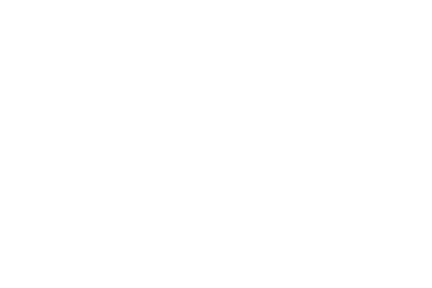

In [15]:
# TODO: Train your agent here.
%load_ext autoreload
%autoreload 2
import numpy as np
from agents.agent import DDPG
from task import Task
import matplotlib.pyplot as plt
%matplotlib notebook

task = Task(init_pose_2,
            init_velocities_2,
            init_angle_velocities_2,
            runtime)

agent = DDPG(task)                                                       

display_graph = True
display_freq = 1

period = period_2
base1  = base1_2
base11 = base1_21
range1 = range1_2
range11= range1_21
base2  = base2_2
base21 = base2_21
range2 = range2_2
range21= range2_21

fig, left_graph= plt.subplots(1,1)                                        #fig, ax1 = plt.subplots()
right_graph = left_graph.twinx()
left_graph.set_xlim(0, period)                                           # this is typically time
left_graph.set_ylim(base1, range1)                                       # limits to your y_21
right_graph.set_xlim(0, period)                                          # time, again
right_graph.set_ylim(base2, range2)                                      # limits to your y_21
left_graph.set_xlabel('time (s)')                                        #ax1.set_xlabel('time (s)')
left_graph.tick_params(axis='x', labelcolor=color4)                      #ax1.tick_params(axis='y', labelcolor=color)
left_graph.set_ylabel('z', color=color2)                                 #ax1.set_ylabel('exp', color=color)
left_graph.tick_params(axis='z', color=color2)
right_graph.set_ylabel('Reward', color=color3)                           #ax2.set_ylabel('sin', color=color)
right_graph.tick_params(axis='y', color=color3)                          #ax2.tick_params(axis='y', labelcolor=color)

total_rewards_2 = []
train_model21(best_x_21, best_y_21, best_y_22)

for episode in range(num_episodes + 1):
    state = agent.reset_episode()
    done = False
    
    x_21, y_21, y_22 = [], [], []
    
    while done is False:
        x_21.append(task.sim.time)                                          # x: time
        y_21.append(task.sim.pose[2])                                      # y_21: z axis
        y_22.append(agent.total_reward)                                    #y_21: score
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        
    # store total rewards of each episode
    total_rewards_2.append(np.amax(y_22))
        
    # store if best reward
    if np.amax(y_22) > np.amax(best_y_22):
        best_x_21, best_y_21, best_y_22 = x_21, y_21, y_22
        print("Episode {:4d}: Reward {}".format(episode, np.amax(best_y_21)))
        
    if (episode % display_freq == 0) and (display_graph is True):
        train_model21(x_21, y_21, y_22)      
        print("\rEpisode = {:4d}, score = {:7.3f}, total = {:7.3f}, (best = {:7.3f}), noise_scale = {}".format(
              i_episode, agent.score, agent.total_reward, agent.best_score, agent.noise_scale), end="")
        
print("Best total reward = {}".format(np.amax(best_y_22)))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


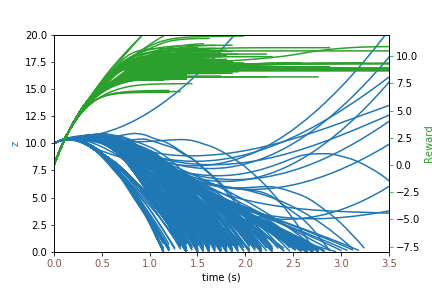

Episode    0: Reward 8.461106466741644
Episode = 1000, score =   0.000, total =   8.468, (best =    -inf), noise_scale = 0.1Episode    2: Reward 8.468384040474328
Episode = 1000, score =   0.000, total =   8.476, (best =    -inf), noise_scale = 0.1Episode    3: Reward 9.570868915289088
Episode = 1000, score =   0.223, total =   9.376, (best =   1.355), noise_scale = 0.1Episode   28: Reward 10.90191769617629
Episode = 1000, score =   0.394, total =   7.879, (best =   1.355), noise_scale = 0.1Episode   76: Reward 11.652224924795307
Episode = 1000, score =   0.375, total =   9.752, (best =   1.355), noise_scale = 0.1Episode  131: Reward 11.86305998807014
Episode = 1000, score =   0.366, total =   9.525, (best =   1.355), noise_scale = 0.1Episode  146: Reward 13.672267321329363
Episode = 1000, score =   0.314, total =   9.104, (best =   1.355), noise_scale = 0.1Episode  160: Reward 14.363673041493845
Episode = 1000, score =   0.388, total =  14.364, (best =   1.355), noise_scale = 0.1Episo

<IPython.core.display.Javascript object>


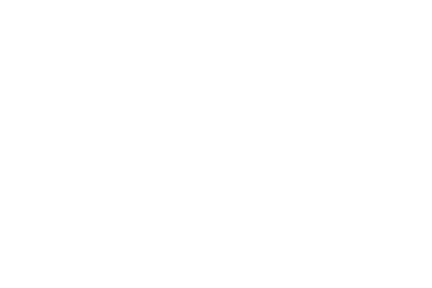

In [16]:
# TODO: Train your agent here.
%load_ext autoreload
%autoreload 2
import numpy as np
from agents.agent import DDPG
from task import Task
import matplotlib.pyplot as plt
%matplotlib notebook

task = Task(init_pose_3,
            init_velocities_3,
            init_angle_velocities_3,
            runtime)

agent = DDPG(task)                                                       

period = period_3
base1  = base1_3
base11 = base1_31
range1 = range1_3
range11= range1_31
base2  = base2_3
base21 = base2_31
range2 = range2_3
range21= range2_31

fig, left_graph= plt.subplots(1,1)                                        #fig, ax1 = plt.subplots()
right_graph = left_graph.twinx()
left_graph.set_xlim(0, period)                                           # this is typically time
left_graph.set_ylim(base1, range1)                                       # limits to your y_31
right_graph.set_xlim(0, period)                                          # time, again
right_graph.set_ylim(base2, range2)                                      # limits to your y_32
left_graph.set_xlabel('time (s)')                                        #ax1.set_xlabel('time (s)')
left_graph.tick_params(axis='x', labelcolor=color4)                      #ax1.tick_params(axis='y', labelcolor=color)
left_graph.set_ylabel('z', color=color2)                                 #ax1.set_ylabel('exp', color=color)
left_graph.tick_params(axis='z', color=color2)
right_graph.set_ylabel('Reward', color=color3)                           #ax2.set_ylabel('sin', color=color)
right_graph.tick_params(axis='y', color=color3)                          #ax2.tick_params(axis='y', labelcolor=color)

total_rewards_3 = []
train_model31(best_x_31, best_y_31, best_y_32)

for episode in range(num_episodes + 1):
    state = agent.reset_episode()
    done = False
    
    x_31, y_31, y_32 = [], [], []
    
    while done is False:
        x_31.append(task.sim.time)                                        # x: time
        y_31.append(task.sim.pose[2])                                     # y_31: z axis
        y_32.append(agent.total_reward)                                   # y_32: score
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        
    # store total rewards of each episode
    total_rewards_3.append(np.amax(y_32))
        
    # store if best reward
    if np.amax(y_32) > np.amax(best_y_32):
        best_x_31, best_y_31, best_y_32 = x_31, y_31, y_32
        print("Episode {:4d}: Reward {}".format(episode, np.amax(best_y_32)))
        
    if (episode % display_freq == 0) and (display_graph is True):
        train_model31(x_31, y_31, y_32)
        print("\rEpisode = {:4d}, score = {:7.3f}, total = {:7.3f}, (best = {:7.3f}), noise_scale = {}".format(
              i_episode, agent.score, agent.total_reward, agent.best_score, agent.noise_scale), end="")
        
print("Best total reward = {}".format(np.amax(best_y_32)))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


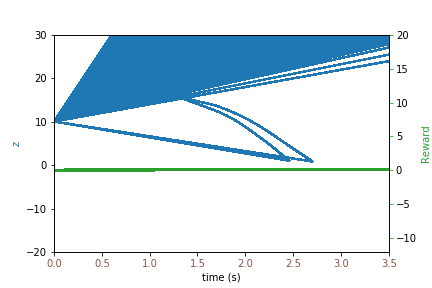

Episode = 1000, score =   0.003, total =   0.141, (best =   0.070), noise_scale = 0.1Best total reward = 0.1542589496722525


<IPython.core.display.Javascript object>


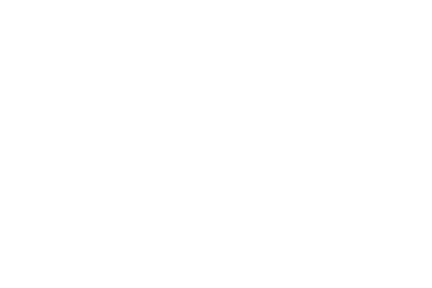

In [19]:
# TODO: Train your agent here.
%load_ext autoreload
%autoreload 2
import numpy as np
from agents.agent import DDPG
from task import Task
import matplotlib.pyplot as plt
%matplotlib notebook

task = Task(init_pose_4,
            init_velocities_4,
            init_angle_velocities_4,
            runtime)

agent = DDPG(task)                                                       

display_graph = True
display_freq = 1

period = period_4
base1  = base1_4
base11 = base1_41
range1 = range1_4
range11= range1_41
base2  = base2_4
base21 = base2_41
range2 = range2_4
range21= range2_41

fig, left_graph= plt.subplots(1,1)                                       # fig, ax1 = plt.subplots()
right_graph = left_graph.twinx()
left_graph.set_xlim(0, period)                                           # this is typically time
left_graph.set_ylim(base1, range1)                                       # limits to your y1
right_graph.set_xlim(0, period)                                          # time, again
right_graph.set_ylim(base2, range2)                                      # limits to your y2
left_graph.set_xlabel('time (s)')                                        # ax1.set_xlabel('time (s)')
left_graph.tick_params(axis='x', labelcolor=color4)                      # ax1.tick_params(axis='y', labelcolor=color)
left_graph.set_ylabel('z', color=color2)                                 # ax1.set_ylabel('exp', color=color)
left_graph.tick_params(axis='z', color=color2)
right_graph.set_ylabel('Reward', color=color3)                           # ax2.set_ylabel('sin', color=color)
right_graph.tick_params(axis='y', color=color3)                          # ax2.tick_params(axis='y', labelcolor=color)

total_rewards_4 = []
x_41, y_41, y_42 = [], [], []
best_x_41, best_y_41, best_y_42 = x_41, y_41, y_42
train_model41(best_x_41, best_y_41, best_y_42)

for episode in range(num_episodes + 1):
    state = agent.reset_episode()
    done = False
    
    while done is False:
        x_41.append(task.sim.time)                                         # x: time
        y_41.append(task.sim.pose[2])                                      # y_41: z axis
        y_42.append(agent.total_reward)                                    #y_42: score
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        
    # store total rewards of each episode
    total_rewards_4.append(np.amax(y_42))
        
    # store if best reward
    if np.amax(y_42) > np.amax(best_y_42):
        best_x_41, best_y_41, best_y_42 = x_41, y_41, y_42
        print("Episode {:4d}: Reward {}".format(episode, np.amax(best_y_42)))
        
    if (episode % display_freq == 0) and (display_graph is True):
        train_model41(x_41, y_41, y_42)
        print("\rEpisode = {:4d}, score = {:7.3f}, total = {:7.3f}, (best = {:7.3f}), noise_scale = {}".format(
              i_episode, agent.score, agent.total_reward, agent.best_score, agent.noise_scale), end="")

print("Best total reward = {}".format(np.amax(best_y_42)))

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

<IPython.core.display.Javascript object>


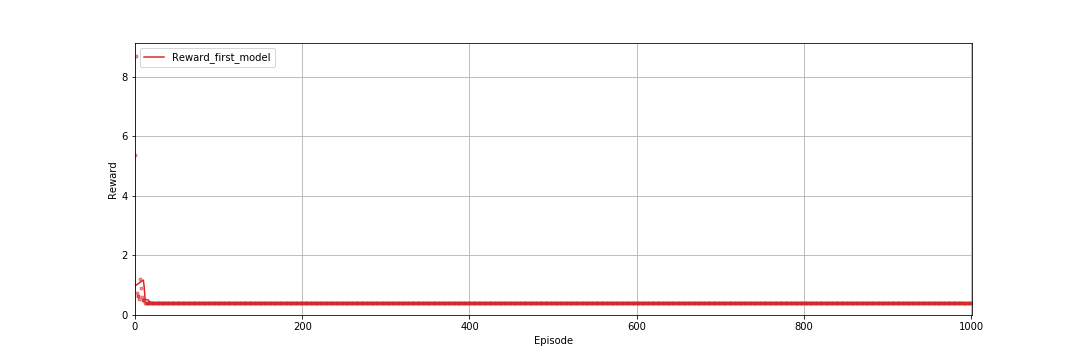

In [32]:
plt.figure(figsize=(15,5))
plt.plot(total_rewards_1, '.', alpha=0.5, color=color)
plt.plot(np.convolve(total_rewards_1, np.ones(21)/21)[(21-1)//2:-21], color=color, label='Reward_first_model')
plt.ylabel('Reward')
plt.legend(loc=2)
plt.grid(True)
plt.xlabel("Episode")
plt.xlim(0, len(total_rewards_1))
plt.show()

<IPython.core.display.Javascript object>


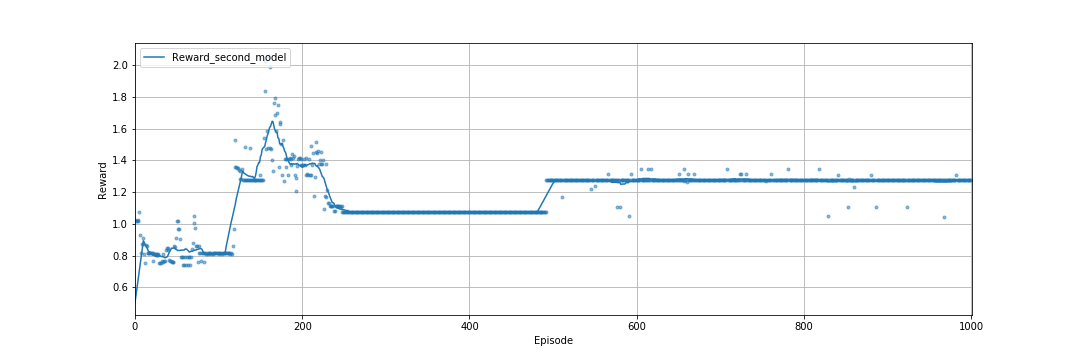

In [34]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure(figsize=(15,5))
plt.plot(total_rewards_2, '.', alpha=0.5, color=color2)
plt.plot(np.convolve(total_rewards_2, np.ones(21)/21)[(21-1)//2:-21], color=color2, label='Reward_second_model')
plt.ylabel('Reward')
plt.legend(loc=2)
plt.grid(True)
plt.xlabel("Episode")
plt.xlim(0, len(total_rewards_2))
plt.show()

<IPython.core.display.Javascript object>


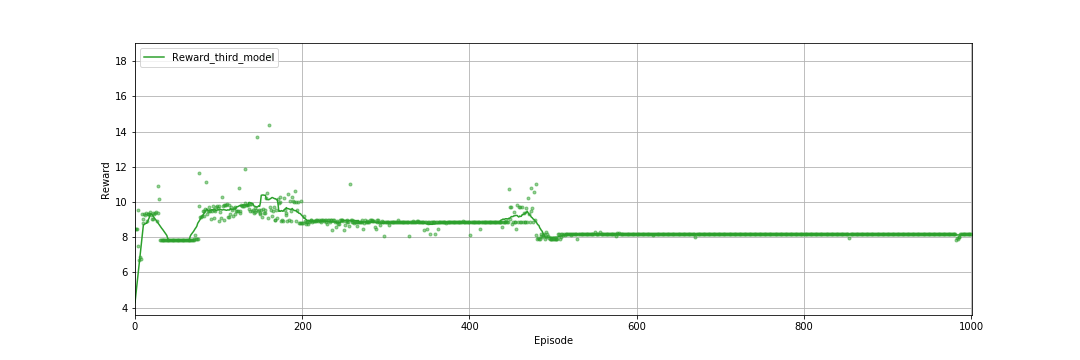

In [36]:
plt.figure(figsize=(15,5))
plt.plot(total_rewards_3, '.', alpha=0.5, color=color3)
plt.plot(np.convolve(total_rewards_3, np.ones(21)/21)[(21-1)//2:-21], color=color3, label='Reward_third_model')
plt.ylabel('Reward')
plt.legend(loc=2)
plt.grid(True)
plt.xlabel("Episode")
plt.xlim(0, len(total_rewards_3))
plt.show()

<IPython.core.display.Javascript object>


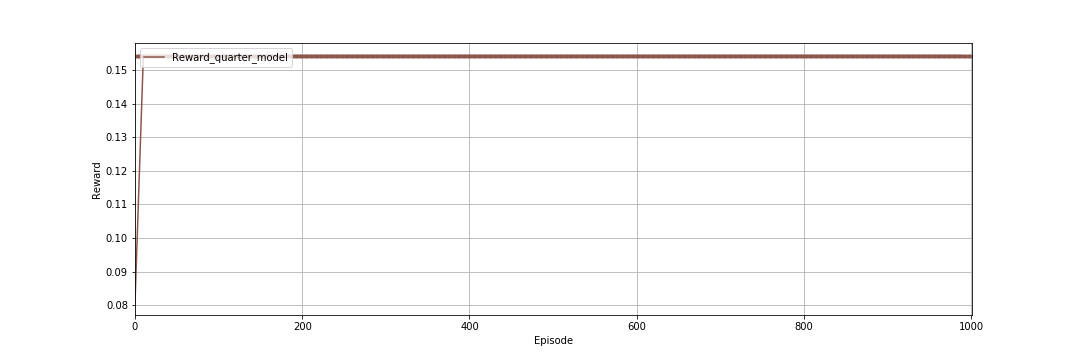

In [38]:
plt.figure(figsize=(15,5))
plt.plot(total_rewards_4, '.', alpha=0.5, color=color4)
plt.plot(np.convolve(total_rewards_4, np.ones(21)/21)[(21-1)//2:-21], color=color4, label='Reward_quarter_model')
plt.ylabel('Reward')
plt.legend(loc=2)
plt.grid(True)
plt.xlabel("Episode")
plt.xlim(0, len(total_rewards_4))
plt.show()

<IPython.core.display.Javascript object>


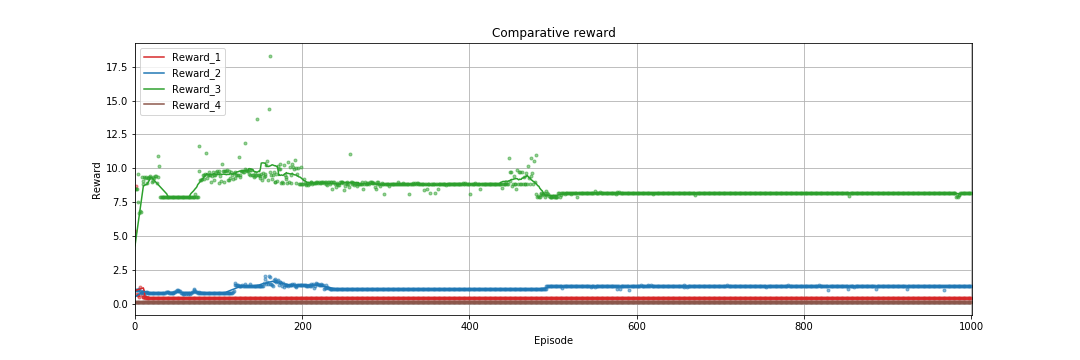

In [40]:
plt.figure(figsize=(15,5))
plt.plot(total_rewards_1, '.', alpha=0.5, color=color)
plt.plot(total_rewards_2, '.', alpha=0.5, color=color2)
plt.plot(total_rewards_3, '.', alpha=0.5, color=color3)
plt.plot(total_rewards_4, '.', alpha=0.5, color=color4)
plt.plot(np.convolve(total_rewards_1, np.ones(21)/21)[(21-1)//2:-21], color=color, label='Reward_1')
plt.plot(np.convolve(total_rewards_2, np.ones(21)/21)[(21-1)//2:-21], color=color2, label='Reward_2')
plt.plot(np.convolve(total_rewards_3, np.ones(21)/21)[(21-1)//2:-21], color=color3, label='Reward_3')
plt.plot(np.convolve(total_rewards_4, np.ones(21)/21)[(21-1)//2:-21], color=color4, label='Reward_4')
plt.title('Comparative reward')
plt.ylabel('Reward')
plt.legend(loc=2)
plt.grid(True)
plt.xlabel("Episode")
plt.xlim(0, len(total_rewards_3))
plt.show()

<IPython.core.display.Javascript object>


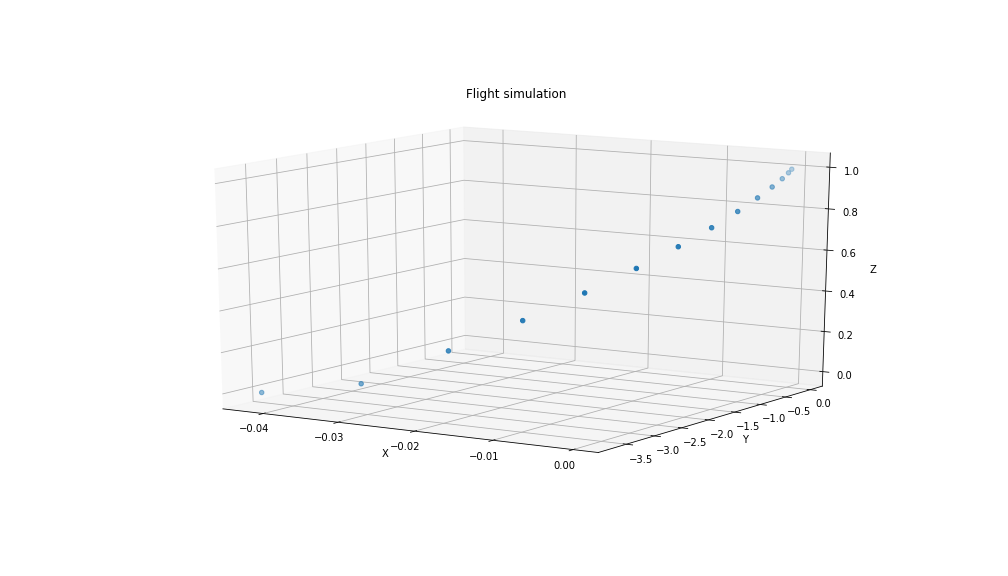

In [41]:
#https://github.com/WittmannF/quadcopter-best-practices
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook 
# Change to %matplotlib inline if dont work

fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(results['x'], results['y'], results['z'])
plt.title('Flight simulation')
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: So, First I chosen four models pose - velocity relationship:

The first model was a wrong position, when the values was all zeros. The model didn´t showed a valid graph or reward due to the graph grow very fast and "broke" your axis.

| Init_pose | Array |
| :-: | :--------: |
| 1 | [0., 0., 0., 0., 0., 0.] |

| Init_velocities | Array |
| :-: | :--------: |
| 1 | [0., 0., 0.] |

The second model kept the same proposed condiction in original notebook in the second pose. The model was in repouse.

| Init_pose | Array |
| :-: | :--------: |
| 2 | [0., 0., 1., -1., 0., 0.] |

| Init_velocities | Array |
| :-: | :--------: |
| 2 | [0., 0., 0.] |

The third model increased ten points than second position and five points than second velocity. The quadricopter start fly.

| Init_pose | Array |
| :-: | :--------: |
| 3 | [0., 0., 10., -10., 0., 0.] |

| Init_velocities | Array |
| :-: | :--------: |
| 3 | [5., 5., 5.] |

The fourth model increased five points than third position and five points than third velocity. The quadricopter is "out of orbit".

| Init_pose | Array |
| :-: | :--------: |
| 4 | [0., 10., 10., -10., 10., 0.] |

| Init_velocities | Array |
| :-: | :--------: |
| 4 | [10., 10., 10.] |

This four pose-velocity relationship show us two limits, since a "absence of vehicle" until a overfitting per axis. 
About first relation, a force applied in a axis without rotor gave me a half hyperbolic tangent graph classic as expected for a axis without rotor. It´s almost a step function.
About a fourth relation, a hypervelocity in each axis gave me a very fast grow Z axis without reward and that is a mistake, I need to obtain a reward to validate my function.

Second,  I used the tanh function instead of sigmoid function because of it´s better than sigmoid about spanset curve to provide a better overview per axis. The idea is to show situations when a axis can be affected by another axis rotor.
But, I applied only in activation and preserved the sigmoid in 'task.py'.

https://stats.stackexchange.com/questions/101560/tanh-activation-function-vs-sigmoid-activation-function

https://keras.io/activations/

| model | score | best | reward |
| :-: | :--------: | :--------: | :--------: |
| 1 | 0.103 | 0.103 | 0 |
| 2 | 0.085 | 0.151 | 3.879888763474226 |
| 3 | 0.410 | 1.356 | 14.146619446348708 |

I believed that I would get the minimum of outliers per simulation, But, I had many outliers as showed my dispertion graph (figure all rewards)
But, I had a simulation with best upper than 1 and this is a value upper than limit. This value to indicate a overlimit limiar and a need to aplly a accelerator limit or brake for conditions upper than five (pose or velocity) in combine conditions with pose and velocity.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
I mounted all blocks proposed by Udacity in a unique DDPG agent and trained my model without comparations with another models.


######################### DDPG: ##########################################################################################

| Variable | original value | new value |
| :-: | :--------: | :--------: |
| buffer_size | 100.000 | 1.000.000 |
| tau | 0.01 | 0.01 |

Add self.total_reward = 0.0 and self.count = 0 in reset episode function

Removed reset_episode_vars and include your itens in _init_ function.

Add self.total_reward += reward and self.count += 1 in step function.

Add the block:
        self.score = self.total_reward / float(self.count) if self.count else 0.0
        if self.score > self.best_score:
            self.best_score = self.score 

######################### DDPG: Actor ####################################################################################

| Variable | original value | new value |
| :-: | :--------: | :--------: |
| layers.Dense | units=32 | units=1000 (states)&(net)|
| layers.Dense | units=64 | units=2000 (net)|
| optimizer | .Adam() | .Adam(lr=0.00001) |
| activation | 'sigmoid' | 'tanh' |

######################### DDPG - Critic: ##################################################################################

| Variable | original value | new value |
| :-: | :--------: | :--------: |
| layers.Dense | units=32 | units=1000 |
| layers.Dense | units=64 | units=2000 |
| optimizer | .Adam() | .Adam(lr=0.00001) |

I used all values proposed by original notebook for hyperparameters and _"variable key"_ and I was testing some models as the hyperbolic tangent and sigmoid (original model).
I added a optimizer with lr=0.00001 because of I want to control unstable behavior in each axis.
The activaction in DDPG - Actor was choiced a tanh instead of sigmoid, but the 'task.py' and agent is using sigmoid due to when I used tanh, my notebook failed. 
I prefered to show how the use of tanh become by graph. For this, I created a alternative agent,  the agent_tanh. The agent_tanh is applied only in a unique cell, but your unstable output forced your cut in my notebook.  
        
https://arxiv.org/pdf/1509.02971v2.pdf        

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

So, I made four models for to show many comportament about a same quadricopter. I believe had obtained limits (minimum and maximum), repoused ('parked' fly) and up to fly. Each simulation cell spend much time than before cell and show more effort about quadricopter.
The first simulation and the forth simulation result in a almost zero reward when I look the comparative reward graph and it´s show two fail models. Each fail seens me a limit, when the first is the absense or 'minimum' and the forth is the maximum or overeffort.
The second simulation show us a around one reward and this is a stablish flight as expected to sigmoid function output.
The thrid simulation show us a almost eight with many episodes almost ten rewards and this show a very effort for a quadricopter try to fly. 

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

The experience in this project was thing really interesting due to it show how a simple model (up a drone) have a complexity envolved in a model. To conclude which point is a maximum learning to a axis, or all axis, as a was, was very complicated. I dont believed which a unique cell simulation answer me a too hard question (fly). For this I used four cells and limited a unique movement (up).
To choice what activation to use is very complex, because spend time, machine and dont permit to compare models in a same simulation. Until to obtain a normal model, was very hard.
Interesting? I saw a model very delicaded, one more force per axis and all quadricopter fall! Learning rate is very important here.